# LangGraph

In [ ]:
## State
Think of state as the memory or data being passed around in your graph.
It’s a dictionary-like object that stores:

- The inputs to the graph.

- The intermediate results of nodes.

- Any variables you want to track across the workflow.
States evolve as the graph executes. Each node may update the state by adding new keys or changing values.

In [ ]:
state = {
    "query": "Find me restaurants nearby",
    "location": "Sydney",
    "results": []
}


In [ ]:
## Node
Nodes are the building blocks (like functions) in the graph.

Each node:

- Takes the current state as input.

- Does some processing (e.g., call an LLM, a tool, or custom logic).

- Returns an updated state.

In [ ]:
def search_node(state):
    query = state["query"]
    results = call_search_api(query, location=state["location"])
    state["results"] = results
    return state

In [ ]:
## Edge
Edges define the flow between nodes.

They tell the graph: after this node, which node should run next?

Types of edges:

- Directed edge: A → B (always go from A to B).

- Conditional edge: If condition is true, go to Node X, otherwise Node Y.

In [ ]:
# If results exist, go to ranking node, else go to fallback node
if len(state["results"]) > 0:
    next_node = "rank_results"
else:
    next_node = "fallback"

In [ ]:
## StateGraph
The StateGraph is the container that holds your entire agent workflow.
Here is an example of How to Use LangGraph:

In [87]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict


In [94]:
class State(TypedDict):
    name: str
graph = StateGraph(State)

def node1(state: State):
    return {"name": state["name"] + "1"}

def node2(state: State):
    return {"name": state["name"] + "2"}

def node3(state: State):
    return {"name": state["name"] + "3"}

def node4(state: State):
    return {"name": state["name"] + "4"}

# Logic
def decide_mood(state):
    name = state["name"]
    if len(name)>5:
        print ("Greater than 5")
        return "long"
    else:
        print("Less than or Equal to 5")
        return "short"

graph.add_node("node1", node1)
graph.add_node("node2", node2)
graph.add_node("node3", node3)
graph.add_node("node4", node4)

# Add an entry point to tell the graph where to start its work each time it is run:
graph.add_edge(START, "node1")
graph.add_conditional_edges("node1", decide_mood, {"long": "node2", "short": "node3"})
graph.add_edge("node2", "node4")
graph.add_edge("node3", "node4")
# Add an exit point to indicate where the graph should finish execution. This is helpful for more complex flows, but even in a simple graph like this, adding an end node improves clarity
graph.add_edge("node4", END)

In [96]:
from IPython.display import Image, display
graph_finished = graph.compile()


In [65]:
len("Chris")

5

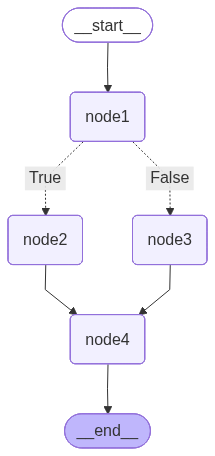

In [59]:
display(Image(graph_finished.get_graph().draw_mermaid_png()))

In [97]:
graph_finished.invoke({"name": "A"})

Less than or Equal to 5


{'name': 'A134'}

In [75]:
graph_finished.invoke({"name": "This is a long name testing"})

Greater than 5


{'name': 'This is a long name testing124'}